In [36]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from nltk import RegexpParser, pos_tag
from nltk.tree import Tree
import matplotlib.pyplot as plt

In [37]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [38]:
# Sample text for testing
sample_text = "It's a dangerous business, Frodo, going out your door. The quick brown fox jumps over the lazy dog."

In [39]:
# Task 1: Tokenization
tokens = word_tokenize(sample_text)
print("Tokenization:")
print(tokens)

Tokenization:
['It', "'s", 'a', 'dangerous', 'business', ',', 'Frodo', ',', 'going', 'out', 'your', 'door', '.', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']


In [40]:
# Task 2: Lower case conversion
lower_case_tokens = [token.lower() for token in tokens]
print("\nLower case conversion:")
print(lower_case_tokens)


Lower case conversion:
['it', "'s", 'a', 'dangerous', 'business', ',', 'frodo', ',', 'going', 'out', 'your', 'door', '.', 'the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']


In [41]:
# Task 3: Stop Words removal
stop_words = set(stopwords.words('english'))
tokens_without_stopwords = [token for token in lower_case_tokens if token not in stop_words]
print("\nStop Words removal:")
print(tokens_without_stopwords)


Stop Words removal:
["'s", 'dangerous', 'business', ',', 'frodo', ',', 'going', 'door', '.', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', '.']


In [42]:
# Task 4: Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens_without_stopwords]
print("\nStemming:")
print(stemmed_tokens)


Stemming:
["'s", 'danger', 'busi', ',', 'frodo', ',', 'go', 'door', '.', 'quick', 'brown', 'fox', 'jump', 'lazi', 'dog', '.']


In [43]:
# Task 5: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens_without_stopwords]
print("\nLemmatization:")
print(lemmatized_tokens)


Lemmatization:
["'s", 'dangerous', 'business', ',', 'frodo', ',', 'going', 'door', '.', 'quick', 'brown', 'fox', 'jump', 'lazy', 'dog', '.']


In [52]:
# Task 6: Chunking
grammar = "NP: {<DT>?<JJ>*<NN>}"
pos_tags = pos_tag(tokens_without_stopwords)
chunk_parser = RegexpParser(grammar)
tree_chunk = chunk_parser.parse(pos_tags)
print("\nChunking:")
print(tree_chunk)


Chunking:
(S
  's/POS
  (NP dangerous/JJ business/NN)
  ,/,
  (NP frodo/NN)
  ,/,
  going/VBG
  (NP door/NN)
  ./.
  (NP quick/JJ brown/JJ fox/NN)
  jumps/NNS
  (NP lazy/JJ dog/NN)
  ./.)


In [56]:
# Task 7: Chinking
grammar_chink = """Chunk: {<.*>+}
                        }<JJ>{"""
chink_parser = RegexpParser(grammar_chink)
tree_chink = chink_parser.parse(pos_tags)
print("\nChinking:")
print(tree_chink)


Chinking:
(S
  (Chunk 's/POS)
  dangerous/JJ
  (Chunk business/NN ,/, frodo/NN ,/, going/VBG door/NN ./.)
  quick/JJ
  brown/JJ
  (Chunk fox/NN jumps/NNS)
  lazy/JJ
  (Chunk dog/NN ./.))


In [58]:
# Task 8: Named Entity Recognition (NER)
ner_tree = nltk.ne_chunk(pos_tags)
print("\nNamed Entity Recognition (NER):")
print(ner_tree)


Named Entity Recognition (NER):
(S
  's/POS
  dangerous/JJ
  business/NN
  ,/,
  frodo/NN
  ,/,
  going/VBG
  door/NN
  ./.
  quick/JJ
  brown/JJ
  fox/NN
  jumps/NNS
  lazy/JJ
  dog/NN
  ./.)


<Figure size 1000x600 with 0 Axes>

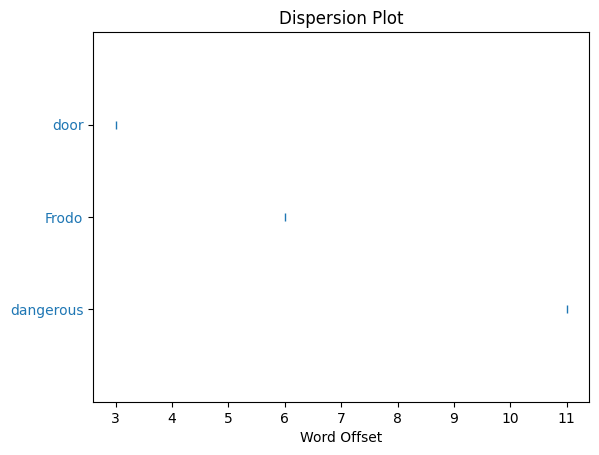

In [59]:
# Task 9: Making a Dispersion Plot
# Convert sample text to tokens
tokens_dispersion = nltk.Text(word_tokenize(sample_text))

# Create a dispersion plot
plt.figure(figsize=(10, 6))
tokens_dispersion.dispersion_plot(["dangerous", "Frodo", "door"])
plt.title("Dispersion Plot")
plt.show()

In [60]:
# Task 10: Making a Frequency Distribution
frequency_distribution = FreqDist(tokens_without_stopwords)
print("\nFrequency Distribution:")
print(frequency_distribution.most_common())


Frequency Distribution:
[(',', 2), ('.', 2), ("'s", 1), ('dangerous', 1), ('business', 1), ('frodo', 1), ('going', 1), ('door', 1), ('quick', 1), ('brown', 1), ('fox', 1), ('jumps', 1), ('lazy', 1), ('dog', 1)]


In [63]:
# Task 11: Parse tree or Syntax Tree generation
grammar = r"""
    NP: {<DT|JJ|NN.*>+}
    PP: {<IN><NP>}
    VP: {<VB.*><NP|PP|CLAUSE>+$}
    CLAUSE: {<NP><VP>}
"""
parser = RegexpParser(grammar)
for sentence in sent_tokenize(sample_text):
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    parsed_sentence = parser.parse(tagged_words)
    print("\nParse tree or Syntax Tree generation:")
    print(parsed_sentence)


Parse tree or Syntax Tree generation:
(S
  It/PRP
  's/VBZ
  (NP a/DT dangerous/JJ business/NN)
  ,/,
  (NP Frodo/NNP)
  ,/,
  going/VBG
  out/RP
  your/PRP$
  (NP door/NN)
  ./.)

Parse tree or Syntax Tree generation:
(S
  (NP The/DT quick/JJ brown/NN fox/NN)
  jumps/VBZ
  (PP over/IN (NP the/DT lazy/JJ dog/NN))
  ./.)


In [64]:
# Task 12: POS Tagging
for sentence in sent_tokenize(sample_text):
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    print("\nPOS Tagging:")
    print(tagged_words)


POS Tagging:
[('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('dangerous', 'JJ'), ('business', 'NN'), (',', ','), ('Frodo', 'NNP'), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')]

POS Tagging:
[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]
